In [ ]:
from sklearn.metrics import confusion_matrix
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import cv2
import os

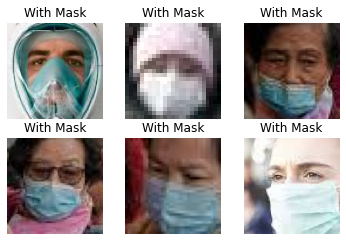

In [ ]:
from os import listdir
listdir()
withmask='faceMaskDataset/Train/WithMask'
train_images_NC=listdir(withmask)
plt.figure(figsize=(6,6))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(withmask,train_images_NC[i])),cmap='gray')
    plt.title('With Mask')
    plt.axis('off')
plt.show()

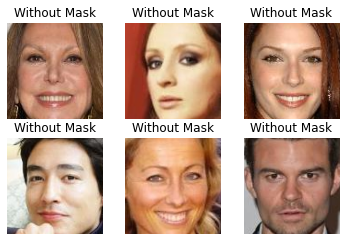

In [ ]:
from os import listdir
listdir()
withoutmask='faceMaskDataset/Train/WithoutMask'
train_images_NC=listdir(withoutmask)
plt.figure(figsize=(6,6))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(withoutmask,train_images_NC[i])),cmap='gray')
    plt.title('Without Mask')
    plt.axis('off')
plt.show()

In [ ]:
total_train_with_mask = len(os.listdir('faceMaskDataset/Train/WithMask'))
total_train_without_mask = len(os.listdir('faceMaskDataset/Train/WithoutMask'))
total_test_with_mask = len(os.listdir('faceMaskDataset/Test/WithMask'))
total_test_without_mask = len(os.listdir('faceMaskDataset/Test/WithoutMask'))
total_val_with_mask = len(os.listdir('faceMaskDataset/Validation/WithMask'))
total_val_without_mask = len(os.listdir('faceMaskDataset/Validation/WithoutMask'))

print("Train sets images with mask: {}".format(total_train_with_mask))
print('--------------------------------------------')
print("Train sets images without mask: {}".format(total_train_without_mask))
print('--------------------------------------------')
print("Test sets images with mask: {}".format(total_test_with_mask))
print('--------------------------------------------')
print("Test sets images without mask: {}".format(total_test_without_mask))
print('--------------------------------------------')
print("Val sets images with mask: {}".format(total_val_with_mask))
print('--------------------------------------------')
print("Val sets images without mask: {}".format(total_val_without_mask))

Train sets images with mask: 5000
--------------------------------------------
Train sets images without mask: 5000
--------------------------------------------
Test sets images with mask: 483
--------------------------------------------
Test sets images without mask: 509
--------------------------------------------
Val sets images with mask: 400
--------------------------------------------
Val sets images without mask: 400


In [ ]:
train_datagen = ImageDataGenerator( horizontal_flip=True, #simetrik
                                    shear_range=0.2, #kırpma
                                    rescale= 1./255, #0-255 -> 0-1 
                                    zoom_range=0.2,) #yakınlaştırma

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)
#veri çeşitlendirme işlemi yaparak modelin aşırı uyum sağlaması(overfitting) engellenir.

train_path='faceMaskDataset/Train'
test_path = 'faceMaskDataset/Test'
val_path = 'faceMaskDataset/Validation'

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=32, #her seferinde 32 adet resim ve etiketten oluşan gruplar 
        shuffle = False, #verilerin karıştırılıp karıştırılmaması
        seed = 42,  #karıştırma ve dönüşüm için isteğe bağlı rastgele tohum  
        class_mode = "categorical", 
        classes = ['WithoutMask','WithMask'])

test_set = test_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

val_set = val_datagen.flow_from_directory(
        val_path,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'WithoutMask': 0, 'WithMask': 1}

In [ ]:
def predict(path):

    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_NEAREST)
    plt.axis('off')
    plt.imshow(img)
    img = np.expand_dims(img,axis=0)
    predict = model.predict(img)
    predict = np.argmax(predict,axis = 1)

    if predict == 1:
      print('With Mask')
    else:
      print('Without Mask')

In [ ]:
from keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
mobilenet = MobileNetV2(input_shape=(224,224,3), weights ="imagenet", include_top = False)

for layer in mobilenet.layers:
    layer.trainable = False
    

model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
mobilenet_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 150s 471ms/step - loss: 0.8135 - accuracy: 0.9665 - val_loss: 0.1893 - val_accuracy: 0.9887
Epoch 2/5
313/313 [==============================] - 138s 440ms/step - loss: 0.1245 - accuracy: 0.9895 - val_loss: 0.0543 - val_accuracy: 0.9925
Epoch 3/5
313/313 [==============================] - 138s 439ms/step - loss: 0.2132 - accuracy: 0.9894 - val_loss: 0.1393 - val_accuracy: 0.9912
Epoch 4/5
313/313 [==============================] - 137s 439ms/step - loss: 0.0620 - accuracy: 0.9961 - val_loss: 0.1398 - val_accuracy: 0.9950
Epoch 5/5
313/313 [==============================] - 138s 440ms/step - loss: 0.0374 - accuracy: 0.9975 - val_loss: 0.1007 - val_accuracy: 0.9962


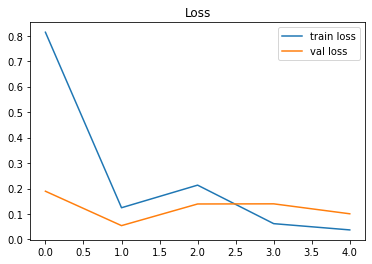

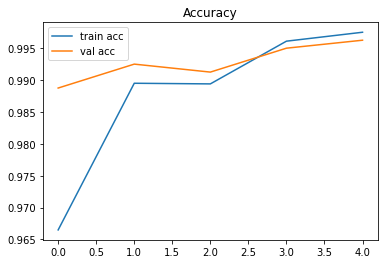

In [ ]:
plt.plot(mobilenet_history.history['loss'], label='train loss')
plt.plot(mobilenet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(mobilenet_history.history['accuracy'], label='train acc')
plt.plot(mobilenet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
mobilenet_auc = model.evaluate(test_set)

31/31 [==============================] - 15s 484ms/step - loss: 0.0099 - accuracy: 0.9990


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 16s 491ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

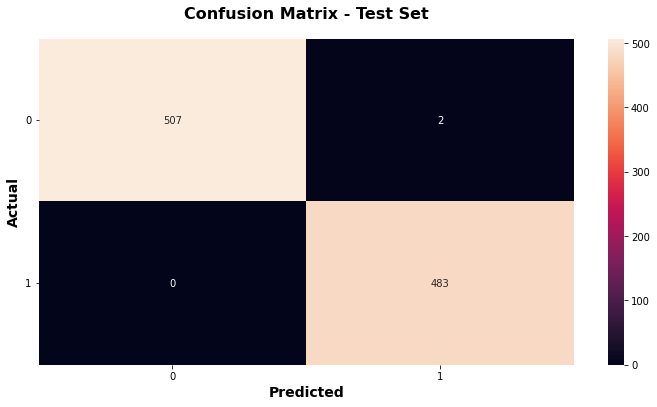

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

1/1 [==============================] - 1s 998ms/step
With Mask


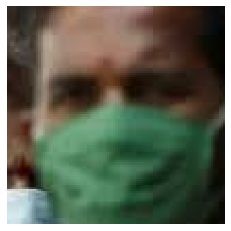

In [ ]:
predict('84.png')

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50 

resnet = ResNet50(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))

for layer in resnet.layers:
    layer.trainable = False


model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 133s 413ms/step - loss: 3.2378 - accuracy: 0.5921 - val_loss: 4.5438 - val_accuracy: 0.5000
Epoch 2/5
313/313 [==============================] - 127s 406ms/step - loss: 2.3553 - accuracy: 0.6853 - val_loss: 0.3563 - val_accuracy: 0.8562
Epoch 3/5
313/313 [==============================] - 127s 407ms/step - loss: 1.6841 - accuracy: 0.7565 - val_loss: 3.5185 - val_accuracy: 0.6012
Epoch 4/5
313/313 [==============================] - 126s 401ms/step - loss: 1.2896 - accuracy: 0.7972 - val_loss: 0.2093 - val_accuracy: 0.9200
Epoch 5/5
313/313 [==============================] - 126s 402ms/step - loss: 1.5007 - accuracy: 0.7810 - val_loss: 0.4119 - val_accuracy: 0.8575


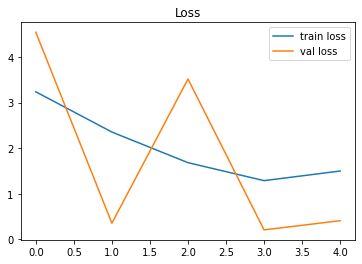

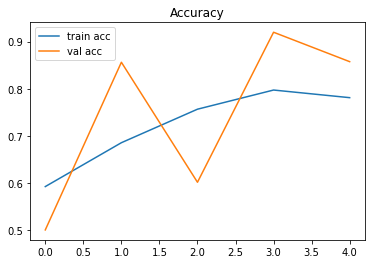

In [ ]:
plt.plot(resnet_history.history['loss'], label='train loss')
plt.plot(resnet_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(resnet_history.history['accuracy'], label='train acc')
plt.plot(resnet_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
resnet_auc = model.evaluate(test_set)

31/31 [==============================] - 4s 120ms/step - loss: 0.4178 - accuracy: 0.8659


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 4s 115ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

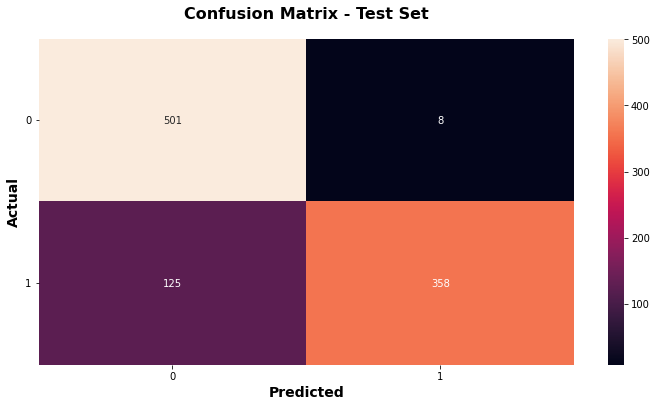

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

1/1 [==============================] - 1s 1s/step
With Mask


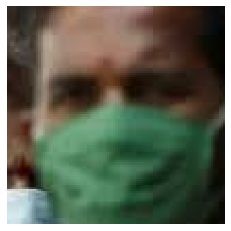

In [ ]:
predict('84.png')

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

inception = InceptionV3(include_top=False, 
                  weights='imagenet', 
                  input_shape=(224,224,3))

for layer in inception.layers:
    layer.trainable = False


model = Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
inception_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 172s 548ms/step - loss: 0.0368 - accuracy: 0.9980 - val_loss: 0.0522 - val_accuracy: 0.9987
Epoch 2/5
313/313 [==============================] - 171s 547ms/step - loss: 0.0657 - accuracy: 0.9967 - val_loss: 7.7783e-08 - val_accuracy: 1.0000
Epoch 3/5
313/313 [==============================] - 171s 546ms/step - loss: 0.1012 - accuracy: 0.9966 - val_loss: 0.0079 - val_accuracy: 0.9987
Epoch 4/5
313/313 [==============================] - 171s 546ms/step - loss: 0.0514 - accuracy: 0.9981 - val_loss: 0.2410 - val_accuracy: 0.9937
Epoch 5/5
313/313 [==============================] - 172s 548ms/step - loss: 0.0595 - accuracy: 0.9974 - val_loss: 0.0523 - val_accuracy: 0.9987


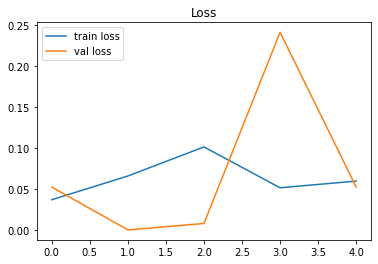

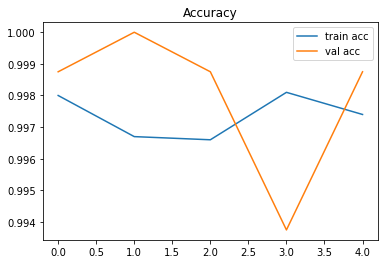

In [ ]:
plt.plot(inception_history.history['loss'], label='train loss')
plt.plot(inception_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(inception_history.history['accuracy'], label='train acc')
plt.plot(inception_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
inception_auc = model.evaluate(test_set)

31/31 [==============================] - 15s 479ms/step - loss: 0.1004 - accuracy: 0.9980


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 15s 486ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

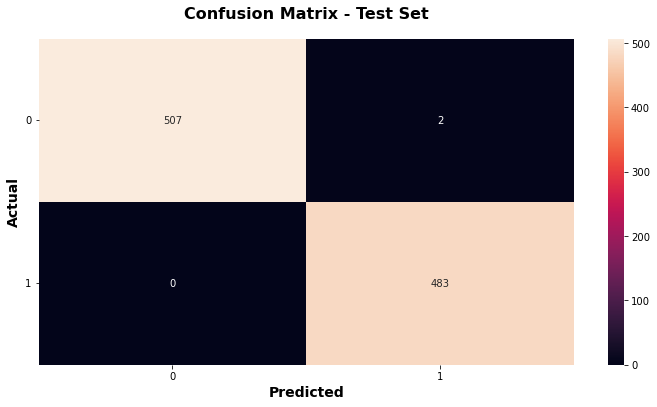

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

1/1 [==============================] - 1s 1s/step
With Mask


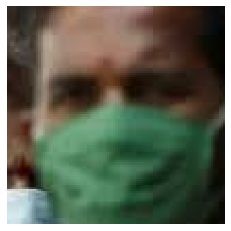

In [ ]:
predict('84.png')

In [ ]:
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [ ]:
model = Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,'softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 111, 111, 64)      1792      
                                                                 
 conv2d_95 (Conv2D)          (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 25, 25, 32)        36896     
                                                                 
 conv2d_97 (Conv2D)          (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                  

In [ ]:
cnn_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 122s 382ms/step - loss: 0.4989 - accuracy: 0.7469 - val_loss: 0.3008 - val_accuracy: 0.9200
Epoch 2/5
313/313 [==============================] - 121s 386ms/step - loss: 0.2470 - accuracy: 0.9091 - val_loss: 0.1353 - val_accuracy: 0.9538
Epoch 3/5
313/313 [==============================] - 119s 381ms/step - loss: 0.1568 - accuracy: 0.9422 - val_loss: 0.1294 - val_accuracy: 0.9538
Epoch 4/5
313/313 [==============================] - 120s 384ms/step - loss: 0.1138 - accuracy: 0.9583 - val_loss: 0.0768 - val_accuracy: 0.9712
Epoch 5/5
313/313 [==============================] - 119s 379ms/step - loss: 0.0895 - accuracy: 0.9686 - val_loss: 0.0540 - val_accuracy: 0.9787


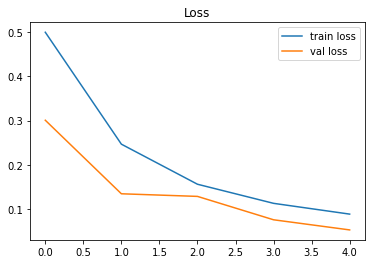

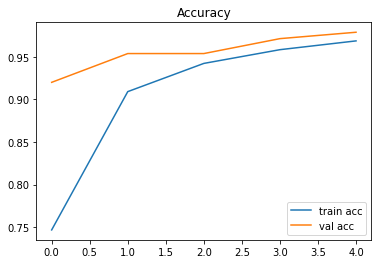

In [ ]:
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
cnn_auc = model.evaluate(test_set)

31/31 [==============================] - 3s 94ms/step - loss: 0.1007 - accuracy: 0.9677


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 3s 92ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

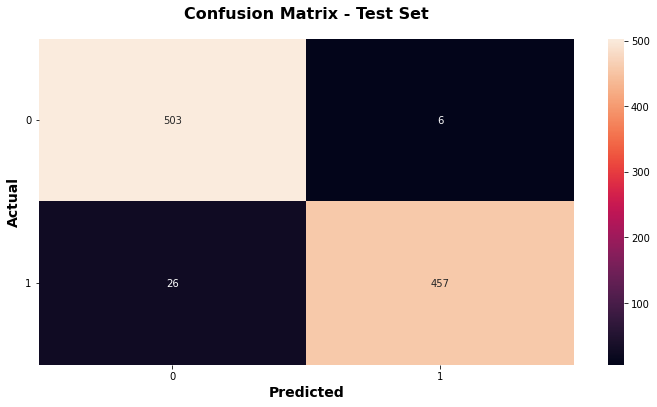

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

1/1 [==============================] - 0s 143ms/step
With Mask


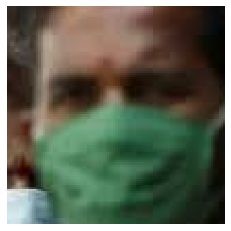

In [ ]:
predict('84.png')

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import  Flatten, Dense, Dropout


denseNet_model = DenseNet201(
    include_top=False,
    weights='imagenet',
   input_shape=(224,224,3)
)

for layer in denseNet_model.layers:
    layer.trainable = False

    
model = Sequential()
model.add(denseNet_model)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])


74836368/74836368 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_5 (Flatten)         (None, 94080)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 188162    
                                                                 
Total params: 18,510,146
Trainable params: 188,162
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
denseNet201_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 147s 433ms/step - loss: 0.8301 - accuracy: 0.9695 - val_loss: 0.0148 - val_accuracy: 0.9962
Epoch 2/5
313/313 [==============================] - 131s 417ms/step - loss: 0.0245 - accuracy: 0.9967 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 3/5
313/313 [==============================] - 132s 421ms/step - loss: 0.0108 - accuracy: 0.9981 - val_loss: 2.3875e-04 - val_accuracy: 1.0000
Epoch 4/5
313/313 [==============================] - 130s 416ms/step - loss: 0.0149 - accuracy: 0.9980 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 5/5
313/313 [==============================] - 131s 420ms/step - loss: 0.0203 - accuracy: 0.9973 - val_loss: 0.0018 - val_accuracy: 0.9987


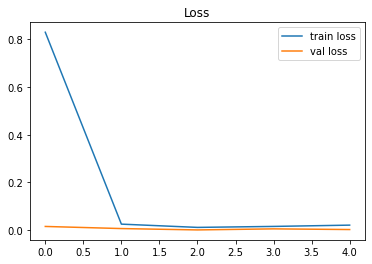

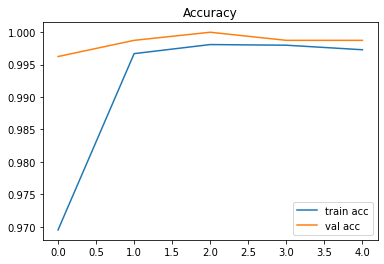

In [ ]:
plt.plot(denseNet201_history.history['loss'], label='train loss')
plt.plot(denseNet201_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(denseNet201_history.history['accuracy'], label='train acc')
plt.plot(denseNet201_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
dense_auc = model.evaluate(test_set)

31/31 [==============================] - 5s 152ms/step - loss: 0.0438 - accuracy: 0.9970


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 7s 145ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

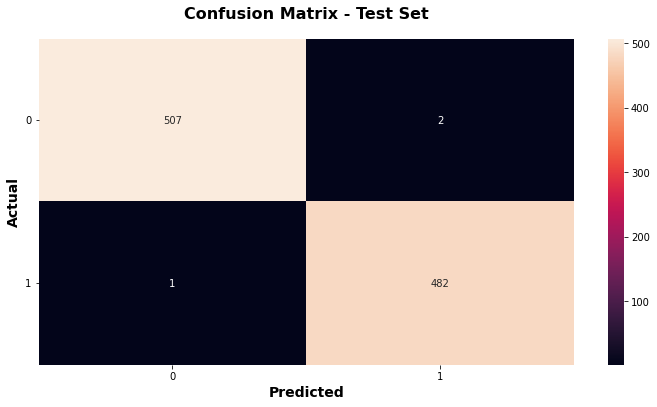

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

1/1 [==============================] - 4s 4s/step
With Mask


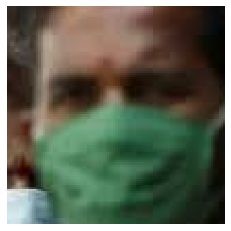

In [ ]:
predict('84.png')

In [ ]:
from tensorflow.keras.applications import VGG16


vgg16_model = VGG16(
    include_top=False,
    weights='imagenet',
   input_shape=(224,224,3)
)

for layer in vgg16_model.layers:
    layer.trainable = False

    
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Compile the Model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
vgg16_history = model.fit(train_set,epochs=5,validation_data=val_set)

Epoch 1/5
313/313 [==============================] - 134s 418ms/step - loss: 0.1907 - accuracy: 0.9514 - val_loss: 0.0218 - val_accuracy: 0.9925
Epoch 2/5
313/313 [==============================] - 130s 416ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0199 - val_accuracy: 0.9925
Epoch 3/5
313/313 [==============================] - 129s 413ms/step - loss: 0.0222 - accuracy: 0.9921 - val_loss: 0.0121 - val_accuracy: 0.9962
Epoch 4/5
313/313 [==============================] - 131s 418ms/step - loss: 0.0198 - accuracy: 0.9927 - val_loss: 0.0233 - val_accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 130s 415ms/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.0303 - val_accuracy: 0.9900


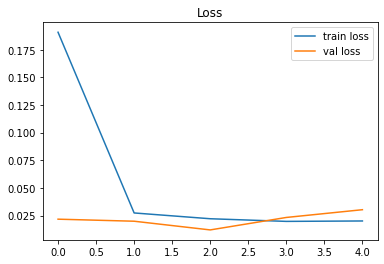

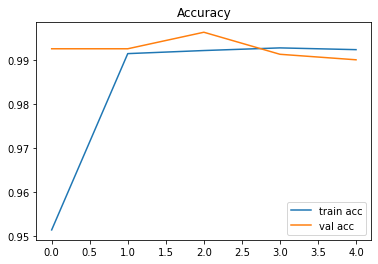

In [ ]:
plt.plot(vgg16_history.history['loss'], label='train loss')
plt.plot(vgg16_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(vgg16_history.history['accuracy'], label='train acc')
plt.plot(vgg16_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
vgg16_auc = model.evaluate(test_set)

31/31 [==============================] - 5s 160ms/step - loss: 0.0349 - accuracy: 0.9879


In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

31/31 [==============================] - 5s 156ms/step


Text(0.5, 1.0, 'Confusion Matrix - Test Set')

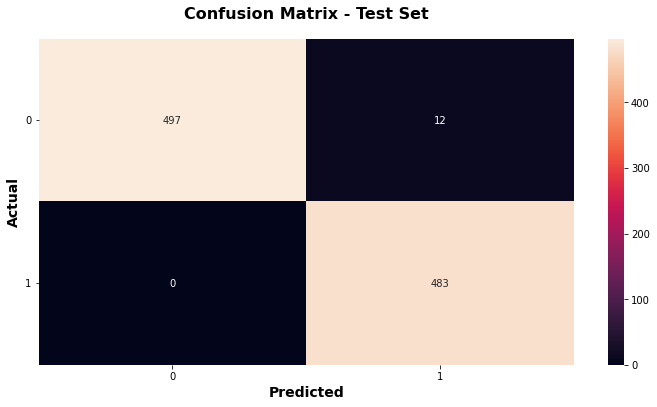

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

1/1 [==============================] - 1s 719ms/step
With Mask


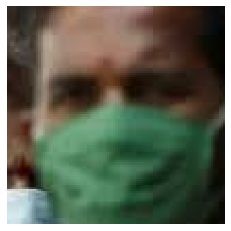

In [ ]:
predict('84.png')

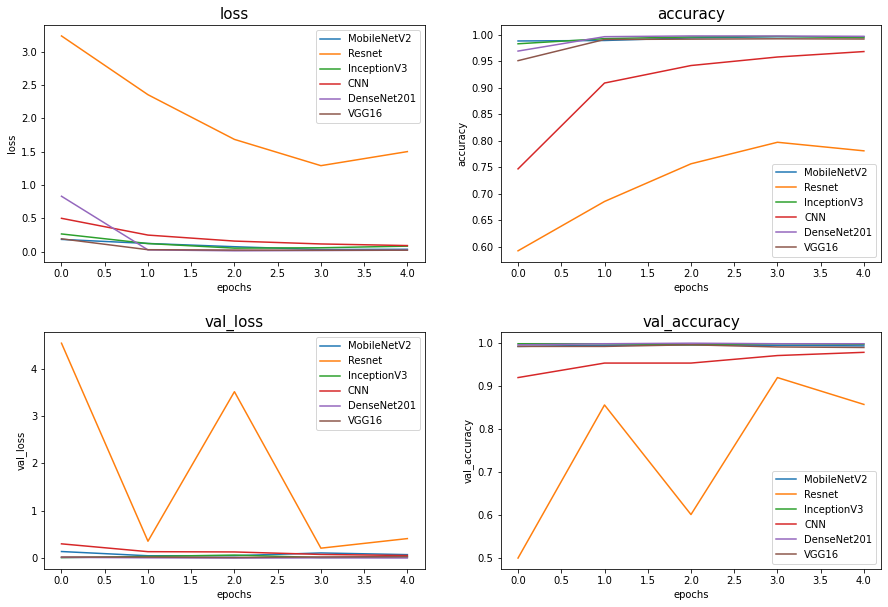

In [ ]:
model_hist = [mobilenet_history,resnet_history,inception_history,cnn_history,denseNet201_history,vgg16_history]
names = ['MobileNetV2','Resnet','InceptionV3','CNN','DenseNet201','VGG16']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in model_hist[0].history:
    index = list(model_hist[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in model_hist:
        ax.plot(history.history[metric], label=names[name_index])
        name_index += 1
    ax.set_title(metric, size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.legend()
plt.show()

In [ ]:
data={'Nets':['MobileNetV2','Resnet','InceptionV3','CNN','DenseNet','VGG16'],
      'Accuracy':[mobilenet_auc[1],resnet_auc[1],inception_auc[1],cnn_auc[1],dense_auc[1],vgg16_auc[1]]}

df =pd.DataFrame(data)

df.sort_values('Accuracy', ascending=False)

,Nets,Accuracy
0,MobileNetV2,0.997984
4,DenseNet,0.996976
2,InceptionV3,0.993952
5,VGG16,0.987903
3,CNN,0.967742
1,Resnet,0.865927
